![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [51]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [52]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [53]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [54]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [55]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


La variable "workingday" es una variable categórica binaria, en cuanto al alquiler de bicicleta en un día laboral o no. Los valores de la media, mínimo y máximo entre estas dos categorias es balanceado, algo mayor para los días laborales con un valor máximo de 977.

En cuanto a "hour", los valores más bajos de alquiler se presentaron entre 23 y 6 horas, evidenciado en los resultados mínimos, media y percentiles de estas horas, con la menor media de 6.4 a las 4am. Hay un aumento importante en el alquiler de bicicletas de 7 a 8am con un máximo de 839 en relación al transporte destino, y durante la tarde entre 16 a 19 horas con máximo de 977 a las 18h y mayor percentil 50% de 480.5 a las 17h, ya que las personas regresan a su origen.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

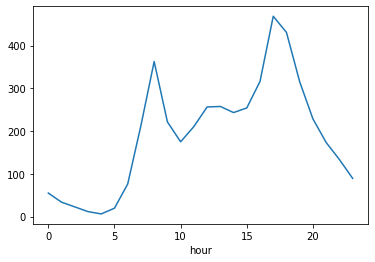

In [56]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
import matplotlib.pyplot as plt

bikes.groupby('hour').total.mean().plot()

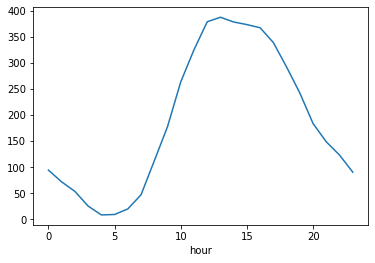

In [57]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

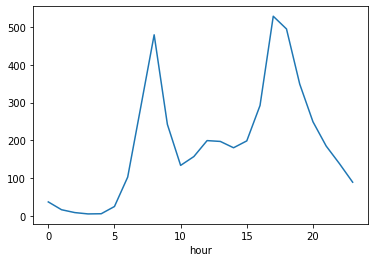

In [58]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

Los días no laborales tienen un aumento gradual en la demanda de renta de bicicletas, encontrandose su maximo entre las 12 y las 17 horas, esto puede deberse al tiempo para recreación.

En los días laborales hay dos picos en el día con aumento de la demanda de la renta de bicicletas, los cuales son entre 7-8 am y las 17-18 horas, lo cual puede estar relacionado a los horarios de destino para las actividades laborales y académicas. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [59]:
# Celda 3

X = bikes[['hour','workingday']]
y = bikes[['total']]

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.3, random_state=0 )

reg = LinearRegression().fit(X_train_reg,y_train_reg)
y_pred = reg.predict(X_test_reg)

print("MSE Regresion:",np.sqrt(metrics.mean_squared_error(y_test_reg, y_pred)))
print("R2:",reg.score(X_test_reg, y_test_reg))
print("Coeficientes:", reg.coef_)
print("Beta 0:",reg.intercept_)

MSE Regresion: 165.4817679274742
R2: 0.15675683746149094
Coeficientes: [[10.52404937  5.97715592]]
Beta 0: [64.78367474]


Interpretación:
Beta 1 = 10.5. Beta 2 = 5.9.
Por cada hora que pasa en el día, el número total de bicicletas alquiladas aumenta en 10.5. En los días laborales se alquilan en promedio 5.9 bicicletas más con respecto a los días no laborales.

Limitaciones: hay un comportamiento no lineal dado por los picos que ocurren durante el día y por la diferencia si es día laboral o no, por lo que las estimaciones de una regresión lineal no tendrán la mejor precisión, la cual espera que la variable aumente o disminuya.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [60]:
# Celda 4

max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [61]:
def calcular_mse(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    y_l = pd.DataFrame(y_l)
    y_l['pred'] = y_l['total'].mean()
    y_r = pd.DataFrame(y_r)
    y_r['pred'] = y_r['total'].mean()

    y_l_r = pd.concat([y_l,y_r])

    mse = ((((y_l_r['total'] - y_l_r['pred'])**2).mean()) ** 0.5)

    return mse

In [62]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 9999]  # j, split, mse
    
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            mse = calcular_mse(X.iloc[:, j], y, split)
                                   
            if mse < best_split[2]:
                best_split = [j, split, mse]
                            
    return best_split

In [63]:
def tree_grow(X, y, level=0, max_mse=9998, max_depth=None, min_depth=6, num_pct=10):#
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1) #, max_mse=0
        return tree
    
    j, split, mse = best_split(X, y, num_pct)
    
    y_pred = y.mean()


    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    
    if mse > max_mse:
        return tree
    if level <= min_depth:
        pass    
    elif max_depth is not None:
        if level >= max_depth:
            return tree   
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct) #
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct) #
    
    return tree

In [64]:
tree = tree_grow(X_train_reg, y_train_reg, max_mse=9998, level=0, max_depth=3, num_pct=10)
tree

{'level': 0,
 'mse': 154.21174597715677,
 'n_samples': 7620,
 'sl': {'level': 1,
  'mse': 66.56308902171472,
  'n_samples': 2529,
  'sl': {'level': 2,
   'mse': 35.55224594404588,
   'n_samples': 2217,
   'sl': {'level': 3,
    'mse': 27.85631405051649,
    'n_samples': 1890,
    'sl': {'level': 4,
     'mse': 31.299247719992135,
     'n_samples': 647,
     'sl': {'level': 5,
      'mse': 41.421952167037674,
      'n_samples': 210,
      'sl': {'level': 6,
       'mse': 9999,
       'n_samples': 106,
       'split': -1,
       'y_pred': total    93.528302
       dtype: float64},
      'split': [0, 1.0],
      'sr': {'level': 6,
       'mse': 9999,
       'n_samples': 104,
       'split': -1,
       'y_pred': total    73.759615
       dtype: float64},
      'y_pred': total    83.738095
      dtype: float64},
     'split': [1, 1.0],
     'sr': {'level': 5,
      'mse': 21.743342023137252,
      'n_samples': 437,
      'sl': {'level': 6,
       'mse': 9999,
       'n_samples': 218,
      

Se crea de forma manual un árbol de decisión, el cual itera sobre las variables "hour" y "workingday" y tiene al menos seis nodos al definir min_depth=6.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [65]:
# Celda 5
max_depth_range = range(1, 21)

rmse_scores = []

for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error').mean()
    rmse_scores.append(np.mean(np.sqrt(-scores)))

Text(0, 0.5, 'rmse_scores')

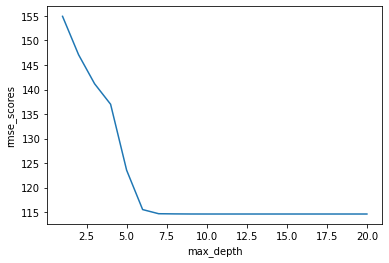

In [66]:
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('rmse_scores')

In [67]:
sorted(zip(rmse_scores, max_depth_range))[::-1][0]

(154.91625364883495, 1)

In [68]:
clf = DecisionTreeRegressor(max_depth=7, random_state=1)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=7, random_state=1)

In [69]:
print(rmse_scores[6])

114.70302272002844


El mejor desempeño se obtiene cuando el árbol cuenta con una profundidad de máxima de 7. El MSE es de 114.7 mejor respecto a la regresión lineal de 165.4.



## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [70]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [71]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [72]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [73]:
# Celda 6
max_depth_range = range(1, 21)

accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

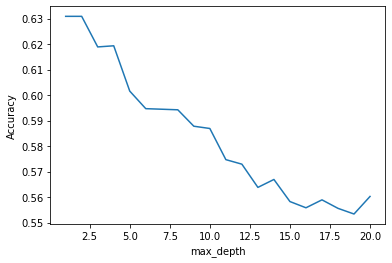

In [74]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [75]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

El mejor desempeño del modelo seria con un accuracy de 0.63 y una profundidad máxima de 2.

In [76]:
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1_T= metrics.f1_score(y_pred, y_test)
Accuracy_T=metrics.accuracy_score(y_pred, y_test)
print("F1 Tree Classifier",F1_T )
print("Accuracy Tree Classifier",Accuracy_T )

F1 Tree Classifier 0.6448598130841121
Accuracy Tree Classifier 0.6453333333333333


In [77]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5) 
lr.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [78]:
lr.coef_

array([[-6.60648040e-04, -1.73620088e-05,  1.32412817e-04,
        -1.12344093e-06, -1.87860305e-06, -1.45400381e-06,
         2.57580818e-05, -4.38361831e-06,  3.06891696e-05,
         4.50480870e-06, -9.47723146e-06, -7.31185950e-06,
         9.78256875e-08, -8.40906988e-07, -1.04907417e-06,
         2.55913986e-07,  7.34786187e-07, -1.78393076e-06,
        -3.85038618e-04,  3.17343935e-05, -3.85535435e-04,
        -6.42603848e-07, -1.78285076e-06, -8.71700675e-07,
        -9.61938248e-05, -7.15309004e-05,  7.13837407e-04,
         7.08240255e-06,  2.06579629e-06, -2.34802699e-06,
        -8.91584429e-08, -8.57077812e-07, -7.67517075e-07,
        -2.49953274e-07, -5.74638159e-07,  1.18453194e-07,
         7.58672879e-07,  8.77126073e-07, -2.48167405e-07,
        -6.33419588e-07, -1.55270380e-06,  6.12468789e-07,
         1.60603314e-07, -5.82478317e-07, -1.84949325e-07,
        -5.32944787e-08, -3.52157217e-08, -1.17736062e-06,
        -7.01242439e-07, -6.92727220e-07, -2.51511176e-0

In [79]:
y_pred = lr.predict(X_test)
F1_T= metrics.f1_score(y_pred, y_test)
Accuracy_T=metrics.accuracy_score(y_pred, y_test)
print("F1 Logistic CV",F1_T )
print("Accuracy Logistic CV",Accuracy_T )

F1 Logistic CV 0.5991735537190082
Accuracy Logistic CV 0.612


El árbol de clasificación tiene un mejor desempeño respecto a la regresión logística.

F1 Tree Classifier 0.6448598130841121
Accuracy Tree Classifier 0.6453333333333333

F1 Logistic CV 0.5991735537190082
Accuracy Logistic CV 0.612

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [80]:
# Celda 7
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error

In [81]:
tree_0= BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None, random_state=123), n_estimators=100)
tree_1= BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=123), n_estimators=100)
logireg = BaggingClassifier(base_estimator=LogisticRegressionCV(),n_estimators=100)

models = [("t0", tree_0),("t1", tree_1), ("Lg", logireg)]

In [82]:
ensamble = VotingClassifier(estimators=models, voting='hard')
ensamble.fit(X_train.values, y_train)
y_pred = ensamble.predict(X_test)

F1_votacion= metrics.f1_score(y_pred, y_test)
Accuracy_v=metrics.accuracy_score(y_pred, y_test)
print("F1 votacion",F1_votacion)
print("Accuracy votacion",Accuracy_v)

F1 votacion 0.6450304259634888
Accuracy votacion 0.65


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [83]:
# Celda 8
from sklearn.metrics import accuracy_score

def evaluate_models(models, X_train, X_val, y_train, y_val):
	scores = list()
	for name, model in models:
		model.fit(X_train, y_train)
		yhat = model.predict(X_val)
		acc = accuracy_score(y_val, yhat)
		scores.append(acc)
  
	return scores

In [84]:
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)

In [85]:
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)

F1_ponder= metrics.f1_score(yhat, y_test)
Accuracy_p=metrics.accuracy_score(yhat, y_test)
print("F1 ponderada",F1_ponder)
print("Accuracy ponderada",Accuracy_p)

F1 ponderada 0.6635576282478348
Accuracy ponderada 0.6633333333333333


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

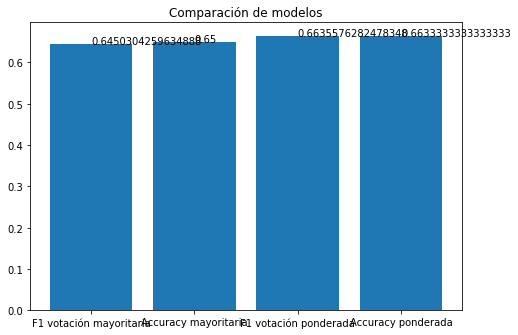

In [86]:
# Celda 9
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['F1 votación mayoritaria', 'Accuracy mayoritaria', 'F1 votación ponderada', 'Accuracy ponderada']
ejeY = [F1_votacion, Accuracy_v, F1_ponder, Accuracy_p]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El modelo de ensamble con la metodología de votación ponderada tiene un mejor desempeño respecto a la votación mayoritaria.

F1 ponderada 0.6564171122994652
Accuracy ponderada 0.6573333333333333

F1 votacion mayoritaria 0.6413559322033898
Accuracy votacion mayoritaria 0.6473333333333333

En la votación mayoritaria, se predice según la clase que obtiene la mayor cantidad de votos, sigue la distribución de las etiquetas pronosticadas individualmente. La ventaja de la votación ponderada es que logra un rendimiento más alto porque le da más peso a los votos de alta confianza, por lo cual se recomienda para un conjunto de clasificadores bien calibrados.